<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

![](https://stimg.cardekho.com/pwa/img/CarDekho-Logo.svg)

# Introduction to Linear Regression: Buying the Right Car 🚗


## Intro


Imagine this...

You've been working for a year as a data expert and finally save enough money to buy a car. Being a thrifty data expert, you want to get the best bang for your buck. 

Imagine that you also have data from the car website [CarDekho](https://www.cardekho.com/), which has information on a wide variety of cars, including their price. You realize that you can use that data to make sure you get a good deal on a new car. In particular, you can figure out exactly how much you should pay for a specific type of car. This can be especially helpful if you run into a tricky car salesperson! 

But the question is how can you use the data to figure out how much you should pay? 

You can use Linear Regression! 

Linear Regression is a method for discovering the relationship between two variables in the dataset, such as price of the car and the year it was made. Data Scientists rely on this method for solving a wide range of problems, especially when it comes to prediction. 

Let's get started! 

**In this notebook, we'll:**
- Fetch and explore a dataset of cars
- Visualize our dataset with graphs
- Use linear regression to make predictions
- Optional: Use multiple linear regression to make better predictions
- Challenge: Discover the best-value cars!


## Fetching the Data 




We will use a very common data science library called Pandas to load the dataset into this notebook. Using pandas we can read our datafile (cardata.csv) with the line below. Our data will then be assigned and stored under the variable car_data.  


In [2]:
#@title Run this to import libraries and your data! { display-mode: "form" }
#Please run `pip install pandas` in the terminal if the below doesn't work for you
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import os # Good for navigating your computer's files 
import gdown

# gdown.download('https://drive.google.com/uc?id=1nDjHLBMBZ3THSck1Ah3XyhgtRHIBT2Ec', 'dekho.csv', True)

from google.cloud import storage

def download_public_file(bucket_name, source_blob_name, destination_file_name):
    """Downloads a public blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2a - Linear Regression/car_dekho.csv','dekho.csv')

Downloaded public blob Data/AI Scholars/Sessions 1 - 5/Session 2a - Linear Regression/car_dekho.csv from bucket inspirit-ai-data-bucket-1 to dekho.csv.


In [3]:
# read our data in using 'pd.read_csv('file')'
data_path  = 'dekho.csv'
car_data = pd.read_csv(data_path)

##Exploring the Data  




Great! Now that we have the data from CarDekho we can start exploring it. Running the cell below will output the first five rows in the data. Each row corresponds to a specific car on sale and each column details information about that car. See if you can already spot any pieces of information that might help you find your perfect car. 


In [4]:
# let's look at our 'dataframe'. Dataframes are just like google or excel spreadsheets. 
# use the 'head' method to show the first five rows of the table as well as their names. 
car_data.head() 

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Age            301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


**You'll probably wonder: what are the units of selling price? What does 3.35 mean?! Selling price is actually in lakhs**

Here is a visual representation of the dataset above. ![carcharts.png](https://i.postimg.cc/bNyjtBFT/Screen-Shot-2019-06-06-at-8-04-46-PM.png)


### What do the columns in the data table represent?

Before diving deeper into the data we need to know what kind of information we have on each car. This is exactly what the columns in the data table are telling us. 

You can think about these columns as being the raw ingredients of any future model we build. A good cook knows about every ingredient they are using. Likewise, we need to know about each variable (column) in our dataset. Below are explanations of each one. 

* Car_Name: This column should be filled with the name of the car.

* Age: This column should be filled with the number of years since the car was made. 

* Selling_Price: This column should be filled with the price the owner wants to sell the car at.

* Kms_Driven: This is the distance completed by the car in km.

* Fuel_Type: Fuel type of the car.

* Seller_Type: Defines whether the seller is a dealer or an individual.

* Transmission: Defines whether the car is manual or automatic.



Using code we can select columns in our data table to inspect them more closely. In the cell below we select the Fuel Type column from our car_data variable (which is a dataframe) and then we output the first five rows using .head()

In [6]:
car_data[['Fuel_Type']].head()

,Fuel_Type
0,Petrol
1,Diesel
2,Petrol
3,Petrol
4,Diesel


###Exercise ✍️

In the cell below, select the "Car_Name" column from our "car_data" dataframe and then output the first five rows. 


In [7]:
### YOUR CODE HERE
car_data[['Car_Name']].head()
### END CODE

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


###  How big is our data set? 


Each row in the datatable represents a unique car. Using the information in the columns of the datatable you can select the car that best suits your taste.  

If we only had a few cars to choose from this would be an easy task. But lets see how many rows we have in our datatable. Run the cell below to get the count of rows. 


In [8]:
# use the 'len' method to see how many rows are in our dataframe
print(len(car_data))

301


That's a lot of cars to look at one by one!

Imagine that you are staring at a garage full of cars not knowing which one to choose. That is exactly where we are right now. 

[![ryan-searle-377260-unsplash.jpg](https://i.postimg.cc/15xbXsCp/ryan-searle-377260-unsplash.jpg)](https://postimg.cc/kDcTh3d4)



How can you make your task easier? Luckily as a data expert you can use visualization to organize the cars by the most important variables. 



##  Visualizing the Data


One way to look at the data is to use a scatter plot. A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis.  

A scatter plot is used to understand the relationship between two continuous variables. 

As an example, we can look at `selling price` vs. `age`.

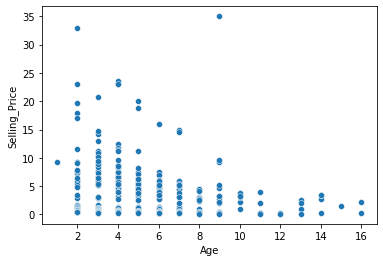

In [9]:
# first we'll grab our handy visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Each dot is a single example (row) from the dataframe, with its 
# x-value as `Age` and its y-value as `Selling_Price`
#To use the  `scatterplot` tool from the `seaborn` plotting package... do the following: 
#sns.scatterplot(x = 'feature_column', y = 'target_column', data = source_data_frame)
sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

### Question 💡


Data science is about understanding stories by looking at data visualizations. What do you hypothesize is going on in the scatter plot above? 


### Visualizing Categorical Data

`Transmission` is another one of our variables. It can either be `Manual`or `Automatic`.  This is different than what we saw with `Selling_Price` in that `Transmission` is NOT a number. 

We call variables like `Transmission` categorical variables. 



### Question 💡
Which of the other variables from our data table are categorical? 

There's a specific type of plot for visualizing categorical variables. This is `catplot`. Let's try it out!

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


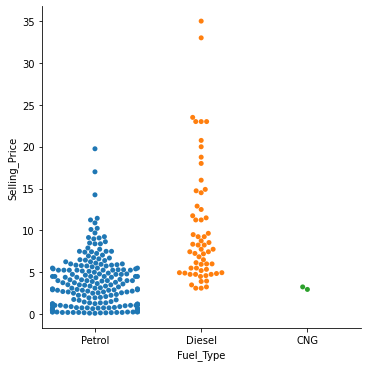

In [10]:
# you can do the same thing with categorical variables!! but you will use catplot instead
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm')

### Question 💡
What do you take away from the plot above? 

###Optional Exercise: Groupby ✍️

Using the `groupby` function in `pandas`, count the number of `Petrol` vs. `Diesel` vs. `CNG` cars in your dataset. (Hint: use a search engine to find examples!)

In [11]:
### YOUR CODE HERE ###
car_data.groupby(['Fuel_Type']).count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


###  Exercise ✍️




How do you think price will vary with Kms_Driven?

Check your hypothesis against a plot!


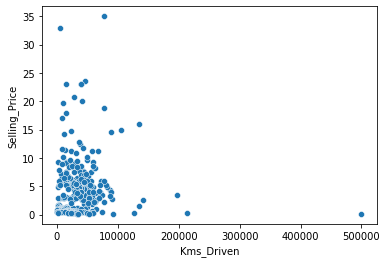

In [12]:
### YOUR CODE HERE
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = car_data)
### END CODE

### Question 💡
Now that we've looked at our data for a few variables, let's take a step back, and ask:

For __ variable, do we expect a car to be more or less expensive? 

* Seller_Type:
* Transmission:

Investigate these with seaborn!


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


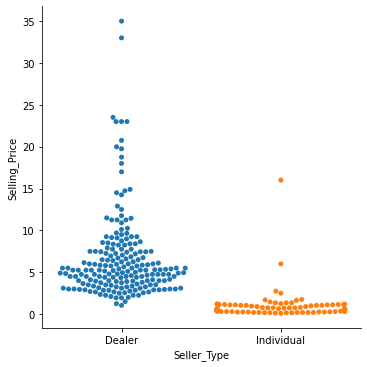

In [13]:
### YOUR CODE HERE
sns.catplot(x="Seller_Type", y="Selling_Price", data=car_data, kind="swarm")
### END CODE

## Linear Regression


### Question 💡

How would you *quantify* the relationship between age and selling price?

### Linear Regression

Linear regression is a statistical approach to find and determine a relationship among an independent variable `x` and a dependent variable `y`. For us, our `x` is `Age` while our `y` is `Selling_Price`. In the below equation, linear regression helps us find the `m` and `b` that best relates our variables. 

$y= mx + b$

Another way to say this is: we create a line that 'summarizes' the story that the data tells us. 

**Let's explore linear regression through a demo!**

[Playground!](http://setosa.io/ev/ordinary-least-squares-regression/)

### Linear Regression in Python

We'll use sklearn to run our linear regression below

In [14]:
import sklearn
#sklearn.linear_model.LinearRegression.fit
# let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn import linear_model
import numpy as np    # Great for lists (arrays) of numbers

x = car_data[['Age']]
y = car_data[['Selling_Price']]

# set up our model
linear = linear_model.LinearRegression()

# train the model 
linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

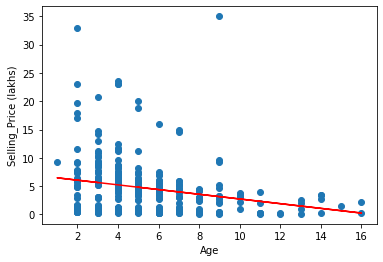

In [15]:
#@title Visualize the fit with this cell!
import matplotlib.pyplot as plt

y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')

plt.scatter(x, y)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (lakhs)')
plt.show()

Remember! We were trying to find the best `b` and `m` to capture our data's story. We can grab this from the trained model. 

In [16]:
print('Our m in lakhs/year: ', linear.coef_)

Our m in lakhs/year:  [[-0.41509169]]


`m` says: The more recent a car is by one year, the selling price is `m` lakhs higher. 

### Question 💡

Let's say you were deciding between a brand new car (2021) and the same model that was 3 years older (2018). How much cheaper should the older car be by our model?

To complete the equation, we still need our intercept `b`

In [17]:
print('Our intercept b: ', linear.intercept_)

Our intercept b:  [6.89120688]


How should we interpret it? Using our `m` and `b` values, how do we find the price of the cars?

### Exercise ✍️

You go to a car salesperson to buy a nice used car. The car you want is a 2016 model and he offers to sell it for 7 lakh. Would you take it? If not, how much would you take it for? 

## (Optional) Multiple Linear Regression: Using multiple inputs 

We can try to make our model better by using multiple input variables, like `Kms_Driven` and `Transmission`. 

`Transmission`, however, is a categorical variable. To use linear regression, we need it to be numeric. We can easily transform `Transmission` to a numeric variable by replacing `Manual` with `1` and `Automatic` with `0`.

In [18]:
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})

In [19]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber
0,ritz,5,3.35,27000,Petrol,Dealer,Manual,1
1,sx4,6,4.75,43000,Diesel,Dealer,Manual,1
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual,1
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual,1
4,swift,5,4.60,42450,Diesel,Dealer,Manual,1


Let's now run our multiple linear regression on our dataset

In [20]:
x = car_data[['Age', 'TransmissionNumber', 'Kms_Driven']]

# set up our model
multiple = linear_model.LinearRegression(fit_intercept = True, normalize = True)

# train the model 
multiple.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

How well did it do compared to our simple linear regression from before? We can actually compare the two with their 'scores'! The score is known as r-squared ($R^2$).

In [21]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(x[['Age']], y)) 

Our single linear model had an R^2 of: 0.056


In [22]:
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(x, y))

Our multiple linear model had an R^2 of: 0.203


In real life, you wouldn't buy a car based on a single variable like `Age`. You would take into account a lot of different variables like our multiple linear model did!

### Exercise ✍️

You noticed that we did not include `Seller_Type` as one of the variables in our multiple linear regression. Figure out what steps you need to take to build a model with `Seller_Type` included. Check the $R^2$ to see if you do any better.

In [23]:
### YOUR CODE HERE
car_data['Seller_Type'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})
### END CODE

In [24]:
x = car_data[['Age', 'TransmissionNumber', 'Kms_Driven','Seller_Type']]
numerous = linear_model.LinearRegression(fit_intercept = True, normalize = True)
numerous.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
print('Our numerous linear model had an R^2 of: %0.3f'%numerous.score(x, y))

Our numerous linear model had an R^2 of: 0.462


## Challenge Section: Finding The Best Deal ✍️

Now that we've made a prediction of each car's price using all the variables, we can compare each car's predicted price to its actual one. We can see which cars are a good deal, and which are overpriced. Let's start by making a scatterplot of predicted vs. real prices, using pyplot methods.

ValueError: ignored

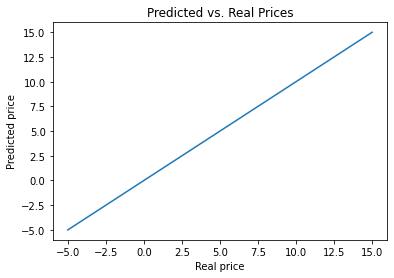

In [26]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
#TODO: Fill in code here to add a scatterplot of predicted vs. real prices
plt.scatter(x=car_data[['Selling_Price']], y=multiple.predict(x))
plt.show()

plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.scatter(x=car_data[['Selling_Price']],*** y=multiple.predict(x))***
plt.show()

There are a few weird things about this graph. Discuss:
*   Which data points seem unusual? Which cars seem most overpriced, and which seem like the best deal?
*   Do the data "look linear" overall? Are predicted prices equally likely to lie above or below the true price, no matter where we are in the graph?
*   Some predicted prices seem impossible - which ones?

These issues suggest that, no matter what our R^2 says, linear regression might not be the best model for this situation. A more complex model could make more accurate predictions.

For now, let's stick with our linear regression. Let's add our predicted prices on to our data frame:



In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

car_data['Prediction'] = prediction
print (car_data)

Now - assuming for now that the predicted scores are good ones - let's figure out the cars that are especially good or bad deals by comparing the real price to the predicted price.

Come up with a way to calculate the "Deal Score", and add a new column to the data frame. A car with a high Deal Score has a low true cost compared to its predicted value, while a car with a low Deal Score is overpriced. 

In [ ]:
car_data['deal_score'] = _________ #your way of calculating the score here
print (car_data)
#You can experiment with different ways of defining it.

Using the pandas sort_values function, identify the 10 most overpriced cars and the 10 cars that are the best deal.

In [ ]:
#Your code here!
print (best_deals)
print (most_overpriced)

Here's the graphing code again from earlier. This time, plot the best deals in one color, the most overpriced cars in another color, and the other cars in a third color. Do your calculations align with your guesses from looking at the graph? What happens if you change your method of calculating the Deal Score?

In [ ]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
#Make a scatterplot with several colors:
#Show 10 best deals in one color
#Show 10 most overpriced in another color
#Show the other cars in a third color
plt.show()

Congratulations! You've now identified the cars that are the best buy.

... Or have you? Why might a car have a lower-than-predicted price, besides a seller making a mistake?

What other data would you need to be really confident in your decision?